# 6-1: Visualizations 

Streamlit and seaborn

- plotting basics
- bar, line and scatter plots


## Seaborn

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Consider seaborn as a replacement for Matplotlib, Pythons de-facto plotting library. Seaborn is built on top of Matplotlib and closely integrated with pandas data structures. 

There are comprehensive documentation and examples of how to use it on their website: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)


`import seaborn as sns` 

## Datasets we will use

- "penguins" The Palmer Penguins dataset: https://github.com/allisonhorst/palmerpenguins
- Analyzing Mobile Usage Patterns and User Behavior Classification Across Devices https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset


## Anatomy of a visualization

https://carbondesignsystem.com/data-visualization/chart-anatomy/

- Canvas / Plot Area - The area where the data is visualized.
- Axis - The x and y lines that help to orient the viewer to the data.
- Title - A brief description of the data being visualized.
- Series / Trace - A single set of data that is plotted on the chart.
- Legend - A key that explains the colors or symbols used in the visualization / series.


## Data Plotting: Kinds of Data

- Categorical data - Discrete values like Yes/No, Red/Green/Blue, etc.
- Ordinal data - Categorical data that has an order to it. Monday, Tuesday, Wednesday, etc.
- Time series data - Data that is recorded over time. Stock prices, temperature, etc.
- Continuous data - Measuments, such as weight, height, price, etc.
- Discrete data - Data that can only take certain values. Number of children, number of cars, etc.
- Geospatial data - Data that is tied to a location. Latitude, Longitude, etc.

## Plot Types

## The Bar Plot

A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the coninouos or discrete values they represent.  One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

Seaborn will automatically aggregate the data for you, using the `estimator` named argument. It takees the values `"mean", "count", "sum", "min"` or `"max"`.

<Axes: title={'center': 'Penguin species count'}, xlabel='species', ylabel='count'>

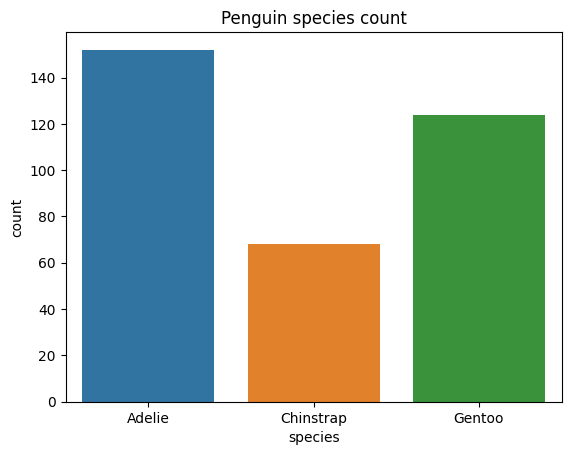

In [20]:
import seaborn as sns
pengo = sns.load_dataset("penguins")
pengo['count'] = 1
plot = sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum")
plot.set_title("Penguin species count")
plot

### Same plot with method chaning

You can chain the title onto the plot.

Text(0.5, 1.0, 'Penguin species count')

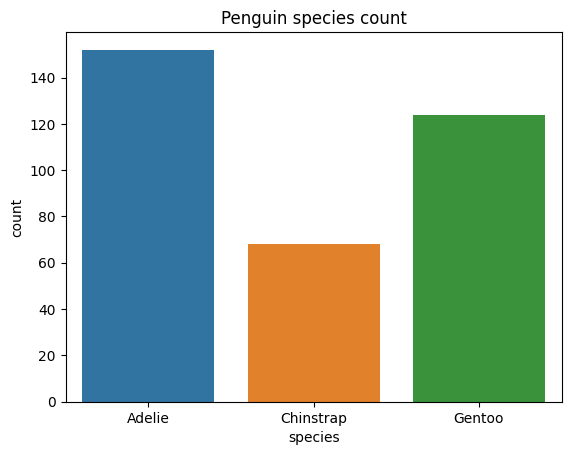

In [21]:
import seaborn as sns
pengo = sns.load_dataset("penguins")
pengo['count'] = 1

sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum").set_title("Penguin species count")


### Plotting with streamlit. 

To plot with streamlit, you need to:

1. import matplotlib python plotter (pyplot) 
2. create a figure and series sub-plots
3. plot into the series
4. display the figure using the `st.pyplot()` function. This function takes a matplotlib figure. 

```python
import seaborn as sns
import matplotlib.pyplot as plt
pengo = sns.load_dataset("penguins")
pengo['count'] = 1

st.dataframe(pengo) # show data 

#create a figure and series
figure, series1 = plt.subplots()
#plot to the series using ax=
sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum", ax=series1).set_title("Total Count by Species")
st.pyplot(figure)
```


`6-1-1-st-barplot.py`

## Challenge 6-1-1

Using the `data/mobile_user_behavior_dataset.csv` file, create a streamlit to show:

1. the data in a dataframe 
2. select a category: gender or operating system
3. select a measure: Data useage, battery drain, screen on time, or app useage time
4. show a bar plot of the average of 3. by 2.


### Errorbars

When you plot with `estimator="mean"` you will see error bars. These are the standard deviation of the data. 

This can be disabled with the `errorbars=None` named argument.

`6-1-1-st-barplot-errorbars.py`

### Hue for additional categories

You can get an additional category by using the `hue` named argument. 


Text(0.5, 1.0, 'Penguin by species and sex count')

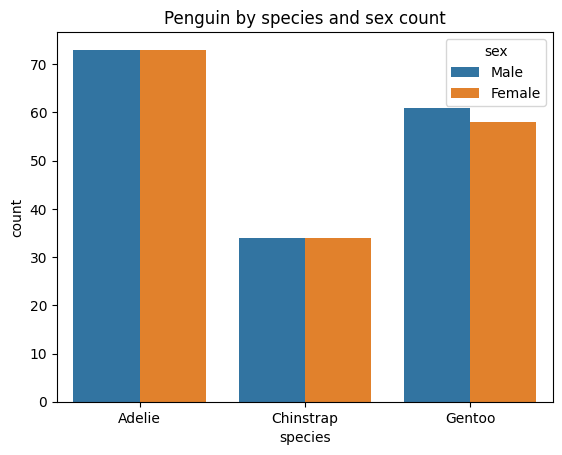

In [22]:
import seaborn as sns
pengo = sns.load_dataset("penguins")
pengo['count'] = 1
sns.barplot(data=pengo, x="species", y="count", hue="sex", estimator="sum").set_title("Penguin by species and sex count")

## Line Plot

Line Plots are for time-series data, or ordinal data. 

The X axis is the time or ordinal data, and the Y axis is the value.

In this case the errorbar will be a shaded area around the line, representing the data spread.

In [25]:
## Line plot
import pandas as pd
company= pd.read_csv("https://raw.githubusercontent.com/mafudge/datasets/master/delimited/fudge_companies.csv")
company.sample(5)

,Month,Dept,Store,Sold,Returned,Ordered
2,1-Jan,Doodads,Fudgemart,200,0,50
17,3-Mar,Niknaks,Mikeazon,120,20,15
20,4-Apr,Doodads,Fudgemart,30,80,30
12,3-Mar,Widgets,Fudgemart,150,30,100
6,2-Feb,Widgets,Fudgemart,120,0,100


Text(0.5, 1.0, 'Total Sold by Month')

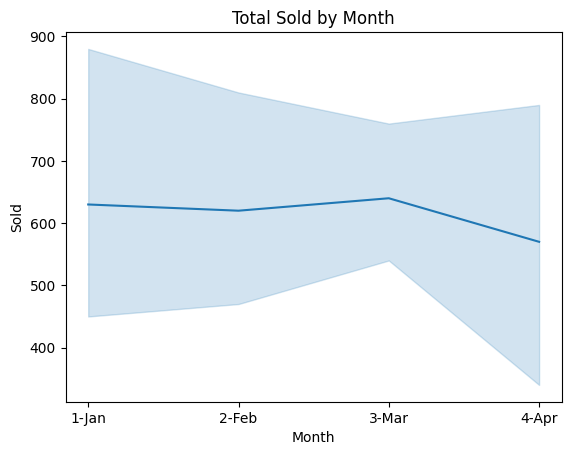

In [26]:
sns.lineplot(data=company, x="Month", y="Sold", estimator="sum").set_title("Total Sold by Month")

Text(0.5, 1.0, 'Total Sold by Month')

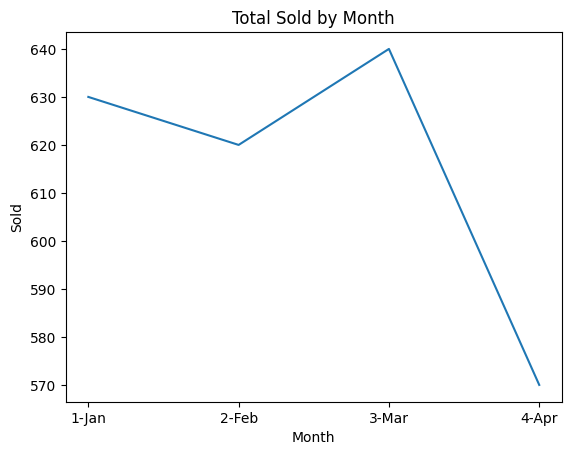

In [27]:
sns.lineplot(data=company, x="Month", y="Sold", estimator="sum", errorbar=None).set_title("Total Sold by Month")

### controlling the axis.

These two plots are the same but they look decieving because the Y axis is different.

You can control the axis with the `ylim` named argument. for example `ylim=(0, 100)` will set the Y axis to 0 to 100.

(300.0, 1000.0)

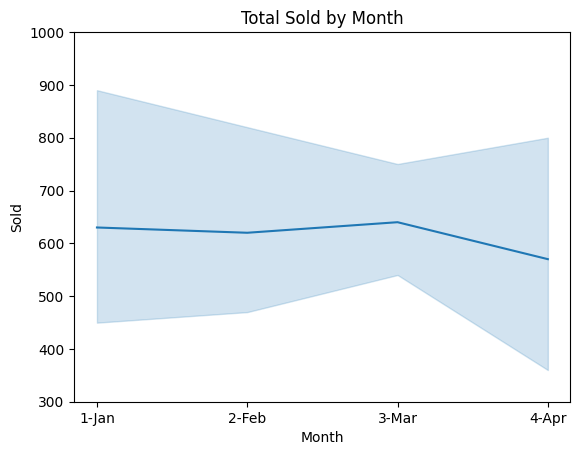

In [32]:
from matplotlib import pyplot as plt
plot, series = plt.subplots()
sns.lineplot(data=company, x="Month", y="Sold",  estimator="sum", ax=series).set_title("Total Sold by Month")
series.set_ylim(300, 1000)


(300.0, 1000.0)

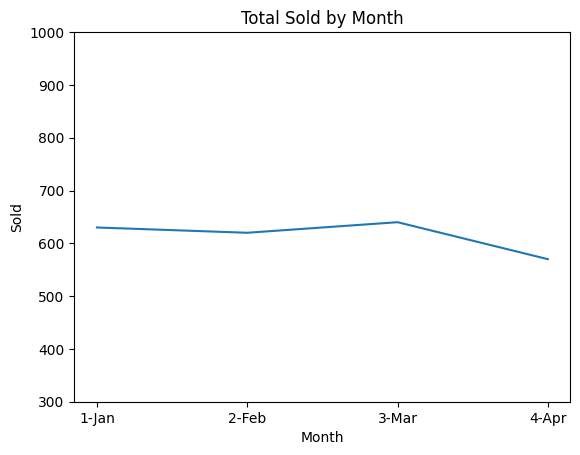

In [33]:
from matplotlib import pyplot as plt
plot, series = plt.subplots()
sns.lineplot(data=company, x="Month", y="Sold",  estimator="sum", ax=series, errorbar=None).set_title("Total Sold by Month")
series.set_ylim(300, 1000)

## Challenge 6-1-2

Write a streamlit to load the `data/mobile_user_behavior_dataset.csv` file, and display the conrents.

which columns are be used the x-axis of a line plot?

Create a plot to show the relationship between someone's age and their data usage.

Create another plot to show the relationship between someone's age and gender and their data usage.


## Scatter Plot

Scatter plots are used to plot two continuous variables against each other. This is use to help visualize relationships between the two variables.

Scatter plots plot each point as a dot, and the position of the dot is determined by the x and y values.

They do not have an estimator because there is no summary of data.

In [35]:
pengo.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
291,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,Male,1
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female,1
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female,1
262,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,Female,1
35,Adelie,Dream,39.2,21.1,196.0,4150.0,Male,1


Text(0.5, 1.0, 'Bill vs Flipper Length')

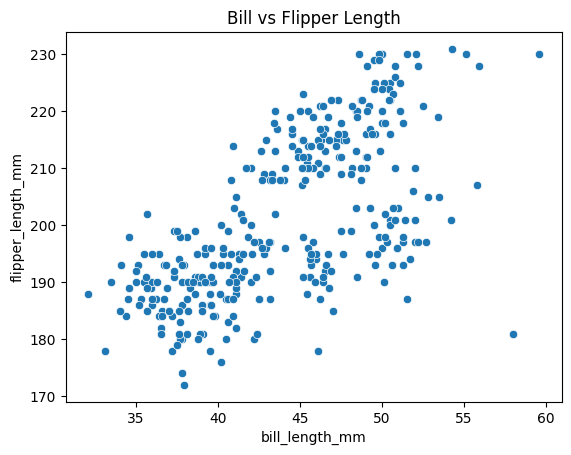

In [36]:
sns.scatterplot(data=pengo, x="bill_length_mm", y="flipper_length_mm").set_title("Bill vs Flipper Length")

### Hue for additional categories

Once again we can add the `hue` named argument to add another category to the plot.

```python
import seaborn as sns
import matplotlib.pyplot as plt
pengo = sns.load_dataset("penguins")
pengo['count'] = 1

plot, series = plt.subplots()
sns.scatterplot(data=pengo, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=series).set_title("Bill Length vs Bill Depth")
st.pyplot(plot)
```

`6-1-1-st-scatterplot.py`


In this example above, you can easily see the relationship between the bill length and bill depth of the penguins broekn down by species.

## Challenge 6-1-3


Write a streamlit to load the `data/mobile_user_behavior_dataset.csv` file, and display the contents.

Among the quantities: "Data Usage (MB/day)", "Battery Drain (mAh/day)", "App Usage Time (min/day)", "Screen On Time (hours/day)",

build a two drop down selectors to choose two of the quantities to plot against each other in a scatter.


What do you see about the relationship between the two quantities?

What does the data tell you? 😊😊😊😊😊
